In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "/content/archive.zip"  # Update this with the actual filename

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/brain_tumor_dataset")

print("Dataset extracted successfully!")

Dataset extracted successfully!


Training Data Shape: (5712, 128, 128, 1)
Testing Data Shape: (1311, 128, 128, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,580 (12.61 MB)

 Trainable params: 3,304,580 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.5661 - loss: 0.9659 - val_accuracy: 0.8364 - val_loss: 0.4039
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8142 - loss: 0.4761 - val_accuracy: 0.8329 - val_loss: 0.3961
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8620 - loss: 0.3684 - val_accuracy: 0.8906 - val_loss: 0.2782
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8954 - loss: 0.2803 - val_accuracy: 0.9116 - val_loss: 0.2295
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9083 - loss: 0.2677 - val_accuracy: 0.9213 - val_loss: 0.2194
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9368 - loss: 0.1748 - val_accuracy: 0.9178 - val_loss: 0.2171
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9387 - loss: 0.1637 - val_accuracy: 0.9370 - val_loss: 0.1832
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9521 - loss: 0.1356 - val_accu

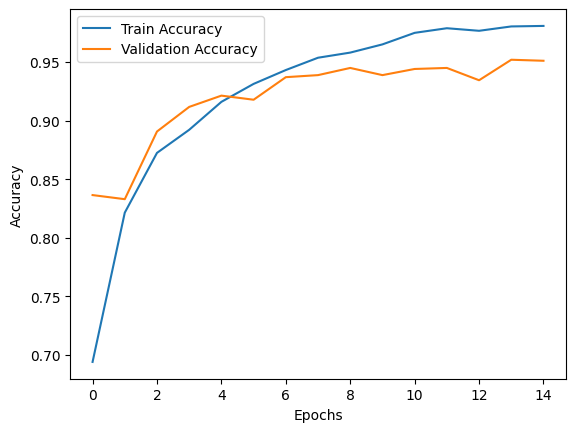

Model saved as brain_tumor_cnn_model_with_4_classes.h5


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dataset Path (adjust if necessary)
train_data_dir = '/content/brain_tumor_dataset/Training'
test_data_dir = '/content/brain_tumor_dataset/Testing'
img_size = 128

# Define the labels (4 categories)
labels = ['notumor', 'glioma', 'meningioma', 'pituitary']

# Function to load and preprocess images from the directory
def load_data(data_dir, img_size):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                data.append([resized_img, class_num])
            except Exception as e:
                pass
    return data

# Load training and testing data
train_data = load_data(train_data_dir, img_size)
test_data = load_data(test_data_dir, img_size)

# Prepare features and labels for both training and testing
X_train = np.array([item[0] for item in train_data]).reshape(-1, img_size, img_size, 1) / 255.0
y_train = to_categorical([item[1] for item in train_data], num_classes=4)

X_test = np.array([item[0] for item in test_data]).reshape(-1, img_size, img_size, 1) / 255.0
y_test = to_categorical([item[1] for item in test_data], num_classes=4)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes output
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("brain_tumor_cnn_model_with_4_classes.h5")
print("Model saved as brain_tumor_cnn_model_with_4_classes.h5")


In [ ]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 95.88%


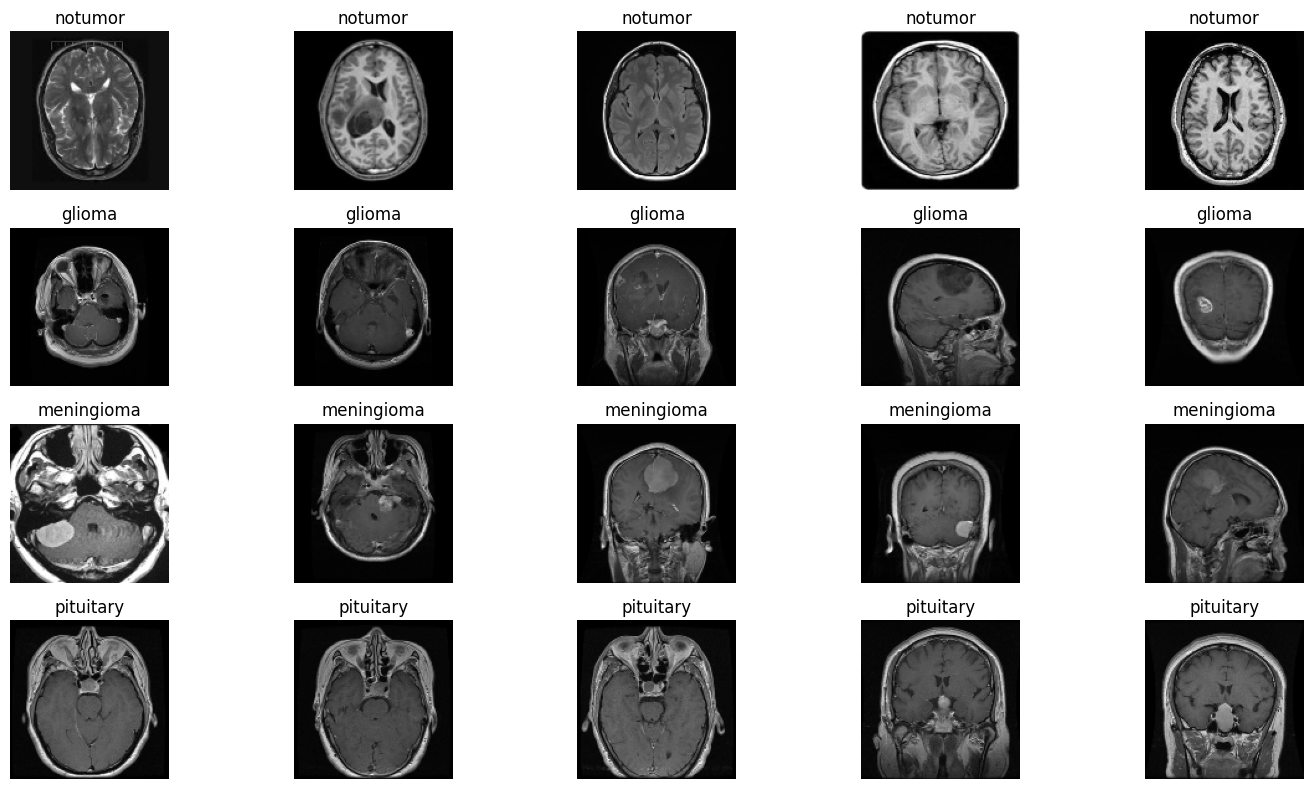

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Dataset path (adjust if necessary)
data_dir = '/content/brain_tumor_dataset/Testing'
img_size = 128

# Define the labels (4 categories)
labels = ['notumor', 'glioma', 'meningioma', 'pituitary']

# Function to load images for plotting
def load_images_for_plot(data_dir, img_size, label_names, num_images=5):
    images = []
    for label in label_names:
        path = os.path.join(data_dir, label)
        for img_name in os.listdir(path)[:num_images]:  # Limit to num_images for each label
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array, (img_size, img_size))
            images.append((resized_img, label))
    return images

# Load images for plotting
images = load_images_for_plot(data_dir, img_size, ['notumor', 'glioma', 'meningioma', 'pituitary'], num_images=5)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 8))

for i, (img, label) in enumerate(images):
    ax = axes[i // 5, i % 5]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


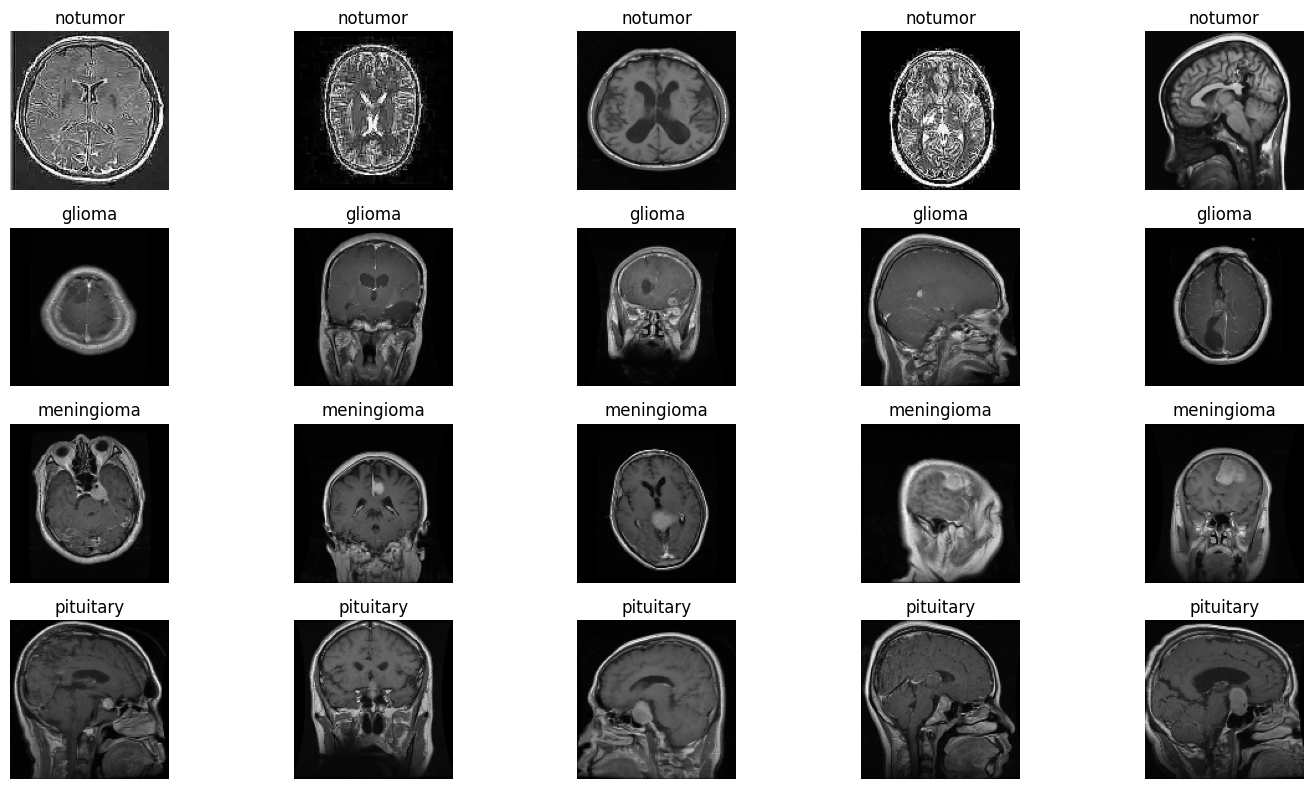

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Dataset path (adjust if necessary)
data_dir = '/content/brain_tumor_dataset/Training'
img_size = 128

# Define the labels (4 categories)
labels = ['notumor', 'glioma', 'meningioma', 'pituitary']

# Function to load images for plotting
def load_images_for_plot(data_dir, img_size, label_names, num_images=5):
    images = []
    for label in label_names:
        path = os.path.join(data_dir, label)
        for img_name in os.listdir(path)[:num_images]:  # Limit to num_images for each label
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array, (img_size, img_size))
            images.append((resized_img, label))
    return images

# Load images for plotting
images = load_images_for_plot(data_dir, img_size, ['notumor', 'glioma', 'meningioma', 'pituitary'], num_images=5)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 8))

for i, (img, label) in enumerate(images):
    ax = axes[i // 5, i % 5]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()
